In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('crime.csv')

In [3]:
df.shape

(507443, 19)

In [4]:
df.head(8)

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,6/15/2016 11:31:00 PM,NaN,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,0
1,20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,10/11/2017 4:55:00 PM,1/29/2018 5:53:00 PM,NaN,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/25/2016 8:00:00 AM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,1,0
3,201872333,201872333239900,2399,0,theft-other,larceny,1/30/2018 7:20:00 PM,NaN,1/30/2018 10:29:00 PM,705 S COLORADO BLVD,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,1,0
4,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,6/22/2017 8:53:00 PM,NaN,6/23/2017 4:09:00 PM,2810 E 1ST AVE,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,1,0
5,201872837,201872837549900,5499,0,traf-other,all-other-crimes,1/31/2018 12:44:00 AM,NaN,1/31/2018 1:29:00 AM,2100 BLOCK E 17TH AVE,3151310.0,1696020.0,-104.961928,39.743149,6,622,city-park-west,1,0
6,20186001015,20186001015230400,2304,0,theft-parts-from-vehicle,theft-from-motor-vehicle,6/1/2017 12:15:00 PM,1/26/2018 12:15:00 PM,1/26/2018 12:24:00 PM,995 N FEDERAL BLVD,3133441.0,1692147.0,-105.025543,39.732790,1,122,villa-park,1,0
7,201870628,201870628570700,5707,0,criminal-trespassing,all-other-crimes,1/30/2018 7:40:00 AM,NaN,1/30/2018 10:33:00 AM,E SPEER BLVD / N GRANT ST,3145202.0,1688799.0,-104.983794,39.723424,3,311,speer,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507443 entries, 0 to 507442
Data columns (total 19 columns):
INCIDENT_ID               507443 non-null int64
OFFENSE_ID                507443 non-null int64
OFFENSE_CODE              507443 non-null int64
OFFENSE_CODE_EXTENSION    507443 non-null int64
OFFENSE_TYPE_ID           507443 non-null object
OFFENSE_CATEGORY_ID       507443 non-null object
FIRST_OCCURRENCE_DATE     507443 non-null object
LAST_OCCURRENCE_DATE      160658 non-null object
REPORTED_DATE             507443 non-null object
INCIDENT_ADDRESS          457870 non-null object
GEO_X                     503263 non-null float64
GEO_Y                     503263 non-null float64
GEO_LON                   503263 non-null float64
GEO_LAT                   503263 non-null float64
DISTRICT_ID               507443 non-null int64
PRECINCT_ID               507443 non-null int64
NEIGHBORHOOD_ID           507443 non-null object
IS_CRIME                  507443 non-null int64
IS_TRAFFIC

In [6]:
df.FIRST_OCCURRENCE_DATE = pd.to_datetime(df.FIRST_OCCURRENCE_DATE)
df.LAST_OCCURRENCE_DATE = pd.to_datetime(df.LAST_OCCURRENCE_DATE)
df.REPORTED_DATE = pd.to_datetime(df.REPORTED_DATE)
#time = df[['FIRST_OCCURRENCE_DATE','LAST_OCCURRENCE_DATE','REPORTED_DATE']]
co_ordinates = df[['GEO_X','GEO_Y','GEO_LON','GEO_LAT']]

In [7]:
df.head(8)

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,2016-06-15 23:31:00,NaT,2016-06-15 23:31:00,NaN,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,0
1,20186000994,20186000994239900,2399,0,theft-other,larceny,2017-10-11 12:30:00,2017-10-11 16:55:00,2018-01-29 17:53:00,NaN,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,2016-03-04 20:00:00,2016-04-25 08:00:00,2016-04-26 21:02:00,2932 S JOSEPHINE ST,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,1,0
3,201872333,201872333239900,2399,0,theft-other,larceny,2018-01-30 19:20:00,NaT,2018-01-30 22:29:00,705 S COLORADO BLVD,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,1,0
4,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,2017-06-22 20:53:00,NaT,2017-06-23 16:09:00,2810 E 1ST AVE,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,1,0
5,201872837,201872837549900,5499,0,traf-other,all-other-crimes,2018-01-31 00:44:00,NaT,2018-01-31 01:29:00,2100 BLOCK E 17TH AVE,3151310.0,1696020.0,-104.961928,39.743149,6,622,city-park-west,1,0
6,20186001015,20186001015230400,2304,0,theft-parts-from-vehicle,theft-from-motor-vehicle,2017-06-01 12:15:00,2018-01-26 12:15:00,2018-01-26 12:24:00,995 N FEDERAL BLVD,3133441.0,1692147.0,-105.025543,39.732790,1,122,villa-park,1,0
7,201870628,201870628570700,5707,0,criminal-trespassing,all-other-crimes,2018-01-30 07:40:00,NaT,2018-01-30 10:33:00,E SPEER BLVD / N GRANT ST,3145202.0,1688799.0,-104.983794,39.723424,3,311,speer,1,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507443 entries, 0 to 507442
Data columns (total 19 columns):
INCIDENT_ID               507443 non-null int64
OFFENSE_ID                507443 non-null int64
OFFENSE_CODE              507443 non-null int64
OFFENSE_CODE_EXTENSION    507443 non-null int64
OFFENSE_TYPE_ID           507443 non-null object
OFFENSE_CATEGORY_ID       507443 non-null object
FIRST_OCCURRENCE_DATE     507443 non-null datetime64[ns]
LAST_OCCURRENCE_DATE      160658 non-null datetime64[ns]
REPORTED_DATE             507443 non-null datetime64[ns]
INCIDENT_ADDRESS          457870 non-null object
GEO_X                     503263 non-null float64
GEO_Y                     503263 non-null float64
GEO_LON                   503263 non-null float64
GEO_LAT                   503263 non-null float64
DISTRICT_ID               507443 non-null int64
PRECINCT_ID               507443 non-null int64
NEIGHBORHOOD_ID           507443 non-null object
IS_CRIME                  507443 n

In [9]:
df.NEIGHBORHOOD_ID.nunique()

78

In [10]:
df.DISTRICT_ID.value_counts()

3    112346
6    101977
1     89328
2     74393
4     71807
5     51714
7      5878
Name: DISTRICT_ID, dtype: int64

In [11]:
df.PRECINCT_ID.nunique()

36

In [12]:
droplist = ['GEO_X','GEO_Y','NEIGHBORHOOD_ID','PRECINCT_ID']

df = df.drop(droplist,axis=1)

In [13]:
df.shape

(507443, 15)

In [15]:
df.head(8)

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_LON,GEO_LAT,DISTRICT_ID,IS_CRIME,IS_TRAFFIC
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,2016-06-15 23:31:00,NaT,2016-06-15 23:31:00,NaN,-104.809881,39.773188,5,1,0
1,20186000994,20186000994239900,2399,0,theft-other,larceny,2017-10-11 12:30:00,2017-10-11 16:55:00,2018-01-29 17:53:00,NaN,-104.781434,39.785649,5,1,0
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,2016-03-04 20:00:00,2016-04-25 08:00:00,2016-04-26 21:02:00,2932 S JOSEPHINE ST,-104.957381,39.663490,3,1,0
3,201872333,201872333239900,2399,0,theft-other,larceny,2018-01-30 19:20:00,NaT,2018-01-30 22:29:00,705 S COLORADO BLVD,-104.941440,39.702698,3,1,0
4,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,2017-06-22 20:53:00,NaT,2017-06-23 16:09:00,2810 E 1ST AVE,-104.955370,39.717107,3,1,0
5,201872837,201872837549900,5499,0,traf-other,all-other-crimes,2018-01-31 00:44:00,NaT,2018-01-31 01:29:00,2100 BLOCK E 17TH AVE,-104.961928,39.743149,6,1,0
6,20186001015,20186001015230400,2304,0,theft-parts-from-vehicle,theft-from-motor-vehicle,2017-06-01 12:15:00,2018-01-26 12:15:00,2018-01-26 12:24:00,995 N FEDERAL BLVD,-105.025543,39.732790,1,1,0
7,201870628,201870628570700,5707,0,criminal-trespassing,all-other-crimes,2018-01-30 07:40:00,NaT,2018-01-30 10:33:00,E SPEER BLVD / N GRANT ST,-104.983794,39.723424,3,1,0


In [14]:
df.INCIDENT_ID.nunique()

469041

In [15]:
df.nunique()

INCIDENT_ID               469041
OFFENSE_ID                507443
OFFENSE_CODE                 156
OFFENSE_CODE_EXTENSION         6
OFFENSE_TYPE_ID              201
OFFENSE_CATEGORY_ID           15
FIRST_OCCURRENCE_DATE     337147
LAST_OCCURRENCE_DATE      117264
REPORTED_DATE             426255
INCIDENT_ADDRESS           97155
GEO_LON                    94757
GEO_LAT                    94208
DISTRICT_ID                    7
IS_CRIME                       2
IS_TRAFFIC                     2
dtype: int64

In [16]:
droplist = ['INCIDENT_ID','OFFENSE_ID']

df = df.drop(droplist,axis=1)

In [17]:
df.shape

(507443, 13)

In [18]:
df.OFFENSE_CATEGORY_ID.value_counts()

traffic-accident                131911
all-other-crimes                 92012
public-disorder                  52841
larceny                          51405
theft-from-motor-vehicle         38376
drug-alcohol                     33392
auto-theft                       27025
burglary                         25020
other-crimes-against-persons     24917
aggravated-assault               11988
white-collar-crime                6868
robbery                           6566
sexual-assault                    4186
arson                              637
murder                             299
Name: OFFENSE_CATEGORY_ID, dtype: int64

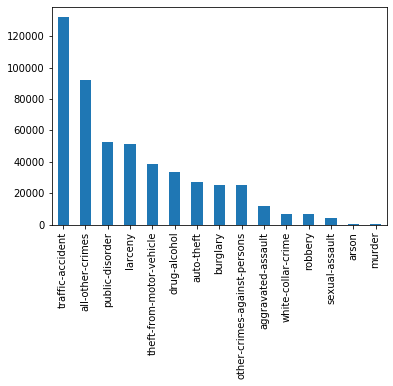

In [19]:
df.OFFENSE_CATEGORY_ID.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.show()

In [20]:
traffic_incident = df.loc[df['OFFENSE_CATEGORY_ID']=='traffic-accident']

In [21]:
traffic_incident.head()

,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_LON,GEO_LAT,DISTRICT_ID,IS_CRIME,IS_TRAFFIC
8,5401,0,traffic-accident-hit-and-run,traffic-accident,2018-01-30 09:10:00,NaT,2018-01-30 09:17:00,W 13TH AVE / N CHEROKEE ST,-104.991650,39.736863,6,0,1
19,5441,0,traffic-accident,traffic-accident,2018-01-30 12:38:00,NaT,2018-01-30 12:38:00,N HAVANA ST / I70 HWYWB,-104.865745,39.775833,5,0,1
21,5441,0,traffic-accident,traffic-accident,2018-01-29 14:16:00,NaT,2018-01-29 15:00:00,E LOWRY BLVD / N YOSEMITE WAY,-104.883909,39.723506,3,0,1
22,5401,0,traffic-accident-hit-and-run,traffic-accident,2018-01-30 15:45:00,NaT,2018-01-30 17:13:00,29TH ST / WELTON ST,-104.975646,39.756668,2,0,1
43,5441,0,traffic-accident,traffic-accident,2018-01-30 16:39:00,NaT,2018-01-30 17:30:00,E 6TH AVE / N IVY LN,-104.920437,39.725338,3,0,1


In [22]:
traffic_incident.OFFENSE_CODE.value_counts()

5441    92107
5401    35837
5420     3967
Name: OFFENSE_CODE, dtype: int64

In [23]:
traffic_incident.shape

(131911, 13)

In [24]:
traffic_incident.LAST_OCCURRENCE_DATE.isnull().sum()

131510

In [25]:
traffic_incident.nunique()

OFFENSE_CODE                   3
OFFENSE_CODE_EXTENSION         1
OFFENSE_TYPE_ID                3
OFFENSE_CATEGORY_ID            1
FIRST_OCCURRENCE_DATE     124644
LAST_OCCURRENCE_DATE         399
REPORTED_DATE             127545
INCIDENT_ADDRESS           27461
GEO_LON                    24336
GEO_LAT                    24096
DISTRICT_ID                    7
IS_CRIME                       1
IS_TRAFFIC                     1
dtype: int64

In [26]:
droplist = ['OFFENSE_CATEGORY_ID','LAST_OCCURRENCE_DATE','IS_CRIME','OFFENSE_CODE_EXTENSION','IS_TRAFFIC']

traffic_incident = traffic_incident.drop(droplist,axis=1)

In [27]:
traffic_incident.shape

(131911, 8)

In [28]:
traffic_incident.nunique()

OFFENSE_CODE                  3
OFFENSE_TYPE_ID               3
FIRST_OCCURRENCE_DATE    124644
REPORTED_DATE            127545
INCIDENT_ADDRESS          27461
GEO_LON                   24336
GEO_LAT                   24096
DISTRICT_ID                   7
dtype: int64

In [29]:
traffic_incident.OFFENSE_TYPE_ID.value_counts()

traffic-accident                92107
traffic-accident-hit-and-run    35837
traffic-accident-dui-duid        3967
Name: OFFENSE_TYPE_ID, dtype: int64

In [30]:
traffic_incident['Cause'] = traffic_incident['OFFENSE_CODE'].replace(to_replace = 5441,value = 'Traffic_accident')
traffic_incident.Cause[traffic_incident['OFFENSE_CODE'] == 5401] = 'Hit_and_Run'
traffic_incident.Cause[traffic_incident['OFFENSE_CODE'] ==5420] = 'Driver_drugged'

C:\Users\vipul\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\vipul\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
traffic_incident.shape

(131911, 9)

In [32]:
traffic_incident.Cause.tail(5)

507424    Traffic_accident
507426    Traffic_accident
507432    Traffic_accident
507437         Hit_and_Run
507440    Traffic_accident
Name: Cause, dtype: object

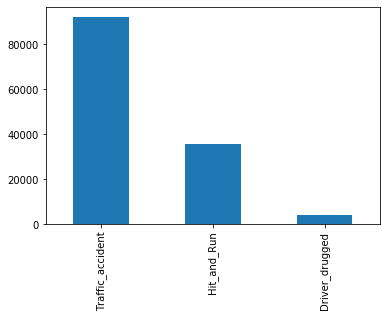

In [33]:
traffic_incident.Cause.value_counts().plot(kind='bar')
plt.show()

In [34]:
#PlOT map with different traffic incidents acc to GEO_LAN and GEO_LAT using heatmap

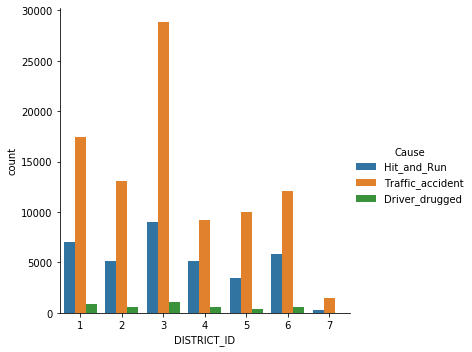

In [35]:
import seaborn as sns

sns.catplot(x='DISTRICT_ID',kind='count',hue='Cause',data=traffic_incident)

In [36]:
cause = traffic_incident.groupby('Cause')['FIRST_OCCURRENCE_DATE'].count()
cause.head()

Cause
Driver_drugged       3967
Hit_and_Run         35837
Traffic_accident    92107
Name: FIRST_OCCURRENCE_DATE, dtype: int64

In [37]:
traffic_incident.head(2)

,OFFENSE_CODE,OFFENSE_TYPE_ID,FIRST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_LON,GEO_LAT,DISTRICT_ID,Cause
8,5401,traffic-accident-hit-and-run,2018-01-30 09:10:00,2018-01-30 09:17:00,W 13TH AVE / N CHEROKEE ST,-104.991650,39.736863,6,Hit_and_Run
19,5441,traffic-accident,2018-01-30 12:38:00,2018-01-30 12:38:00,N HAVANA ST / I70 HWYWB,-104.865745,39.775833,5,Traffic_accident


In [38]:
traffic_incident['Day'] = traffic_incident.FIRST_OCCURRENCE_DATE.dt.day
traffic_incident['Month'] = traffic_incident.FIRST_OCCURRENCE_DATE.dt.month
traffic_incident['Year'] = traffic_incident.FIRST_OCCURRENCE_DATE.dt.year

In [39]:
traffic_incident.head(2)

,OFFENSE_CODE,OFFENSE_TYPE_ID,FIRST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_LON,GEO_LAT,DISTRICT_ID,Cause,Day,Month,Year
8,5401,traffic-accident-hit-and-run,2018-01-30 09:10:00,2018-01-30 09:17:00,W 13TH AVE / N CHEROKEE ST,-104.991650,39.736863,6,Hit_and_Run,30,1,2018
19,5441,traffic-accident,2018-01-30 12:38:00,2018-01-30 12:38:00,N HAVANA ST / I70 HWYWB,-104.865745,39.775833,5,Traffic_accident,30,1,2018


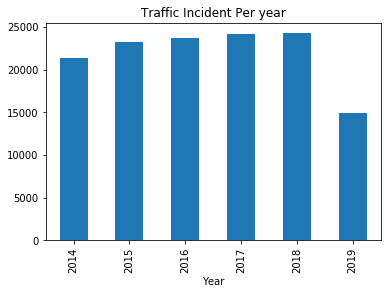

In [40]:
#PlOT map with different traffic incidents acc to incident time
traffic_incident.groupby('Year').count()['OFFENSE_CODE'].plot(kind='bar',title='Traffic Incident Per year')
plt.show()

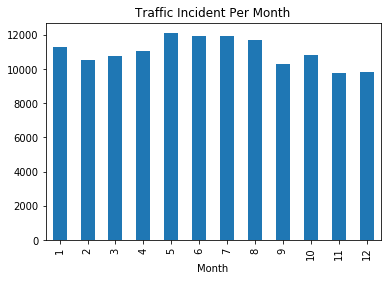

In [41]:
traffic_incident.groupby('Month').count()['OFFENSE_CODE'].plot(kind='bar',title='Traffic Incident Per Month')
plt.show()

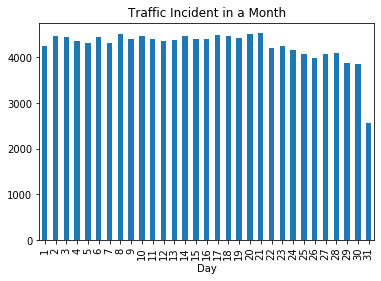

In [42]:
traffic_incident.groupby('Day').count()['OFFENSE_CODE'].plot(kind='bar',title='Traffic Incident in a Month')
plt.show()

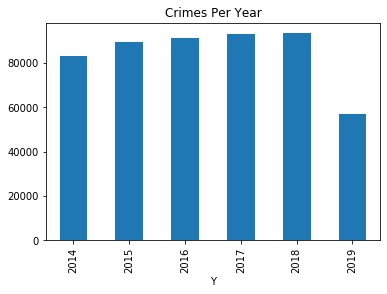

In [44]:
df['Y'] = df.FIRST_OCCURRENCE_DATE.dt.year
df.groupby('Y').count()['OFFENSE_CODE'].plot(kind='bar', title='Crimes Per Year')
plt.show()

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507443 entries, 0 to 507442
Data columns (total 14 columns):
OFFENSE_CODE              507443 non-null int64
OFFENSE_CODE_EXTENSION    507443 non-null int64
OFFENSE_TYPE_ID           507443 non-null object
OFFENSE_CATEGORY_ID       507443 non-null object
FIRST_OCCURRENCE_DATE     507443 non-null datetime64[ns]
LAST_OCCURRENCE_DATE      160658 non-null datetime64[ns]
REPORTED_DATE             507443 non-null datetime64[ns]
INCIDENT_ADDRESS          457870 non-null object
GEO_LON                   503263 non-null float64
GEO_LAT                   503263 non-null float64
DISTRICT_ID               507443 non-null int64
IS_CRIME                  507443 non-null int64
IS_TRAFFIC                507443 non-null int64
Y                         507443 non-null int64
dtypes: datetime64[ns](3), float64(2), int64(6), object(3)
memory usage: 54.2+ MB


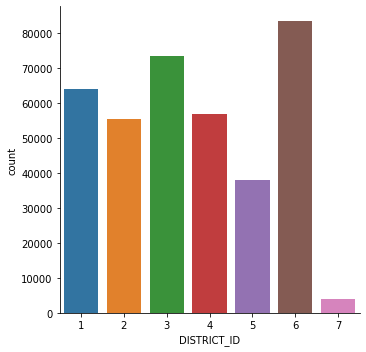

In [46]:
#Most crime in a each district
fig = sns.catplot(x='DISTRICT_ID',kind='count',data=df[df.IS_CRIME == 1])

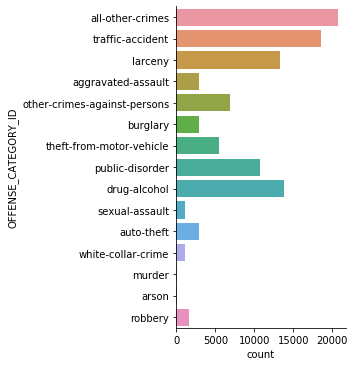

In [47]:
most_dangerous_district = df[df.DISTRICT_ID == 6]
sns.catplot(y='OFFENSE_CATEGORY_ID',kind='count',data = most_dangerous_district)

In [74]:
Most_crime_in_MDD = most_dangerous_district[most_dangerous_district.OFFENSE_CATEGORY_ID == 'all-other-crimes']

d = Most_crime_in_MDD.OFFENSE_TYPE_ID.value_counts()[:5]

d.dtypes()

TypeError: 'numpy.dtype' object is not callable

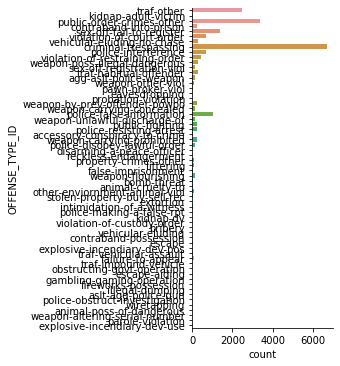

In [48]:
Most_crime_in_MDD = most_dangerous_district[most_dangerous_district.OFFENSE_CATEGORY_ID == 'all-other-crimes']

sns.catplot(y='OFFENSE_TYPE_ID',kind='count',data = Most_crime_in_MDD)

In [49]:
df.rename({'Y':'Year'},inplace=True)

In [50]:
df=df.drop('LAST_OCCURRENCE_DATE',axis=1)

In [51]:
df.tail()

,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_LON,GEO_LAT,DISTRICT_ID,IS_CRIME,IS_TRAFFIC,Y
507438,5499,0,traf-other,all-other-crimes,2018-12-11 18:06:00,2018-12-11 18:22:00,3300 BLOCK E COLFAX AVE,-104.948043,39.739862,2,1,0,2018
507439,2602,1,theft-fail-return-rent-veh,white-collar-crime,2018-11-19 16:00:00,2018-12-14 15:56:00,24890 E 78TH AVE,-104.697230,39.836210,7,1,0,2018
507440,5441,0,traffic-accident,traffic-accident,2018-12-16 17:37:00,2018-12-16 18:43:00,E IOWA AVE / S COLORADO BLVD,-104.940655,39.687491,3,0,1,2018
507441,5499,0,traf-other,all-other-crimes,2018-12-09 05:21:00,2018-12-09 06:15:00,1400 BLOCK N IRVING ST,-105.029758,39.738855,1,1,0,2018
507442,2304,0,theft-parts-from-vehicle,theft-from-motor-vehicle,2018-12-12 16:35:00,2018-12-12 16:42:00,4300 E EVANS AVE,-104.937077,39.678211,3,1,0,2018


In [57]:
all_other_crimes = df.loc[df.OFFENSE_CATEGORY_ID == 'all-other-crimes']
all_other_crimes.head(2)

,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_LON,GEO_LAT,DISTRICT_ID,IS_CRIME,IS_TRAFFIC,Y
0,5213,0,weapon-unlawful-discharge-of,all-other-crimes,2016-06-15 23:31:00,2016-06-15 23:31:00,NaN,-104.809881,39.773188,5,1,0,2016
5,5499,0,traf-other,all-other-crimes,2018-01-31 00:44:00,2018-01-31 01:29:00,2100 BLOCK E 17TH AVE,-104.961928,39.743149,6,1,0,2018


In [58]:
all_other_crimes.head(2)

,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_LON,GEO_LAT,DISTRICT_ID,IS_CRIME,IS_TRAFFIC,Y
0,5213,0,weapon-unlawful-discharge-of,all-other-crimes,2016-06-15 23:31:00,2016-06-15 23:31:00,NaN,-104.809881,39.773188,5,1,0,2016
5,5499,0,traf-other,all-other-crimes,2018-01-31 00:44:00,2018-01-31 01:29:00,2100 BLOCK E 17TH AVE,-104.961928,39.743149,6,1,0,2018


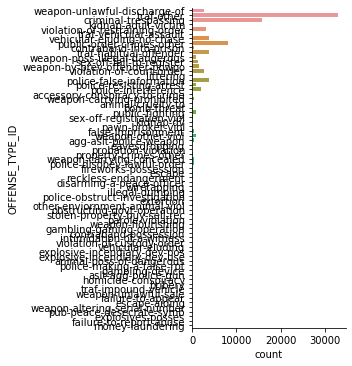

In [60]:
sns.catplot(y='OFFENSE_TYPE_ID',kind='count',data=all_other_crimes)